In [13]:
import pandas as pd
import re
import datetime

In [3]:
df = pd.read_csv('data/sample_with_label.csv')

In [4]:
df.head()

,Unnamed: 0,TweetID,UserName,TweetText,TweetDateTime,Followers,UserID,WasDeleted
0,0,1244721273793646594,ShannePanne,b'Rhoa',2020-03-30 20:20:52,287,990004076829200385,0
1,1,1244721275232301058,25_ShadesOfK,b'@HisTemp_TAYtion Lol I learned from that shi...,2020-03-30 20:20:52,1189,624244930,0
2,2,1244721275936878593,PlagueJesterSky,b'Trying to set up the stream and I keep getti...,2020-03-30 20:20:52,415,755613447702847488,0
3,3,1244721278650650624,spitbull1963,b'@EricksonReal @Ilhan And you can test as muc...,2020-03-30 20:20:53,16,47425986,0
4,4,1244721278931664896,kamanfrancis,b'Me taking notes for the future when I\xe2\x8...,2020-03-30 20:20:53,1928,269295980,0


In [24]:
def hourify(s):
    start = s.find(' ')
    end = s.find(':')
    return int(s[start:end])

In [28]:
# datetime.datetime(df['TweetDateTime'][0])
df['hours'] = df['TweetDateTime'].apply(hourify)
df.head()

,Unnamed: 0,TweetID,UserName,TweetText,TweetDateTime,Followers,UserID,WasDeleted,hours
0,0,1244721273793646594,ShannePanne,b'Rhoa',2020-03-30 20:20:52,287,990004076829200385,0,20
1,1,1244721275232301058,25_ShadesOfK,b'@HisTemp_TAYtion Lol I learned from that shi...,2020-03-30 20:20:52,1189,624244930,0,20
2,2,1244721275936878593,PlagueJesterSky,b'Trying to set up the stream and I keep getti...,2020-03-30 20:20:52,415,755613447702847488,0,20
3,3,1244721278650650624,spitbull1963,b'@EricksonReal @Ilhan And you can test as muc...,2020-03-30 20:20:53,16,47425986,0,20
4,4,1244721278931664896,kamanfrancis,b'Me taking notes for the future when I\xe2\x8...,2020-03-30 20:20:53,1928,269295980,0,20


In [45]:
df_grouped = df.groupby(['WasDeleted', 'hours']).size().reset_index()
df_grouped = df_grouped.rename({0: 'Count'}, axis=1)
df_grouped

,WasDeleted,hours,Count
0,0,1,5507
1,0,2,15390
2,0,3,14760
3,0,4,14048
4,0,5,12303
5,0,6,11343
6,0,7,10682
7,0,8,11077
8,0,9,9739
9,0,10,10048


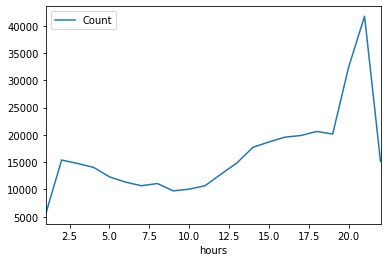

In [50]:
df_grouped[df_grouped['WasDeleted']==0].plot(x = 'hours', y = 'Count')

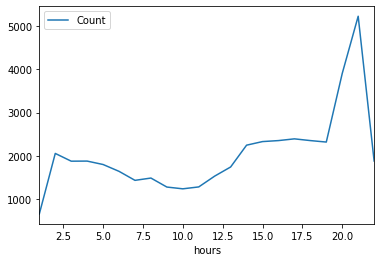

In [51]:
df_grouped[df_grouped['WasDeleted']==1].plot(x = 'hours', y = 'Count')